Directory .results/Gradient_descent_lattice_p=4 cleared.
Directory .results/Gradient_descent_lattice_p=4 created.


/tmp/ipykernel_9351/3435896184.py:89: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(energy_dummy, init_param, method="BFGS", jac=lambda params: numerical_gradient(energy_dummy, params), bounds=bounds, callback=callback)#L-BFGS-B


[1, -3.0702569596469402, 1.1687205538201078, 0.785597220945132, 0.8411789153321692, 0.9065965692417327, 1.1687140722356322, 0.7855900236028616, 0.8411715907440687, 0.9065922190249129]
[2, -4.4863896779716015, 1.2221033217898443, 0.8083194394719719, 0.8706974750700707, 0.9242765946264365, 1.2220970593878442, 0.8083119989605653, 0.8706894959148955, 0.9242721325111692]
[3, -4.804306527599692, 1.2788434120603906, 0.812857056238978, 0.8462533651627753, 0.9056216745451318, 1.2788430105224002, 0.8128478294822881, 0.8462498801358312, 0.9056206265055108]
[4, -4.860066938214004, 1.284817490705302, 0.8026610119270504, 0.8495661948256348, 0.9023109916799014, 1.2848227559474352, 0.8026514681244028, 0.8495569080104516, 0.9023068537312264]
[5, -4.884930647909641, 1.3080853941708042, 0.7761605004501632, 0.8559392717726629, 0.8962440457204456, 1.3056807248711673, 0.7781045758104862, 0.8566589432283526, 0.8976479179193266]
[6, -5.2554638013243675, 1.3114357106252794, 0.7656335773087203, 0.83056558340999

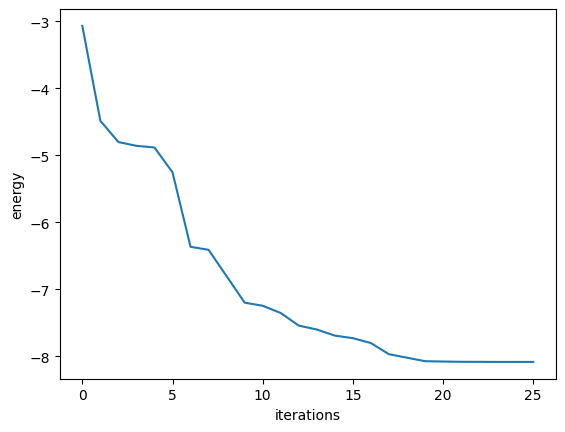

In [5]:
import sys
import os

# Assuming the notebook is in the same directory as the `py` folder or its subfolders
# Adjust the path as necessary
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'py'))
sys.path.append(parent_dir)

# Now you can import your module
from expectation import get_expectation_afm_heisenberg, AFMHeisenbergArgs, get_expectation_afm_heisenberg_lattice, AFMHeisenbergLatticeArgs

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import shutil
import csv
from functools import partial

p = 4
length = 8
filepath_o = ".results/Gradient_descent_lattice_p=4"
filepath = "convergence"
figure = True
b = (0,1)
bounds = [b] * (2 * p)  # Create a list of bounds of length 2 * p

qsim_option = {'t': int(length / 2), 'f': 1}

initial_gamma = np.array([0.6 for i in range(p)])
initial_beta = np.array([0.6 for i in range(p)])
init_param = np.concatenate([initial_gamma, initial_beta])

def clear_and_recreate_directory(dir_path):
    try:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Directory {dir_path} cleared.")
        os.makedirs(dir_path)
        print(f"Directory {dir_path} created.")
    except Exception as e:
        print(f"Error occurred while trying to clear and recreate the directory: {e}")

function_args = AFMHeisenbergLatticeArgs(2,int(length/2), qsim_option)
function = partial(get_expectation_afm_heisenberg_lattice, function_args=function_args)

def energy_dummy(params):
    gamma, beta = np.split(params, 2)
    energy = function(gamma=gamma, beta=beta)
    return energy

# Define the gradient function
def numerical_gradient(func, params, epsilon=1e-2):
    grad = np.zeros_like(params)
    for i in range(len(params)):
        params_eps = np.array(params)
        params_eps[i] += epsilon
        grad[i] = (func(params_eps) - func(params)) / epsilon
    return grad

history_params = []
history_energy = []

def callback(params):
    history_params.append(params)
    history_energy.append(energy_dummy(params))
    gamma, beta = np.split(params, 2)
    record = [len(history_energy), energy_dummy(params)] + list(gamma) + list(beta)
    # Open the file in append mode and write the record
    with open(filepath, mode='a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(record)
        if figure:
            print(record)
        f.flush()

clear_and_recreate_directory(filepath_o)

with open(filepath, mode='w', newline='') as f:
        writer = csv.writer(f)
        headline = ["iter", "energy"]
        for p in range(int(len(initial_gamma))):
            headline.append("gamma[{}]".format(p))
            headline.append("beta[{}]".format(p))
        writer.writerow(headline)

result = minimize(energy_dummy, init_param, method="BFGS", jac=lambda params: numerical_gradient(energy_dummy, params), bounds=bounds, callback=callback)#L-BFGS-B

print(result)
print(history_params)
print(history_energy)

In [ ]:
plt.plot(history_energy)
plt.title('Convergence of energy Heisenberg 2x4 model')
plt.xlabel("iterations")
plt.ylabel("energy")
plt.show()

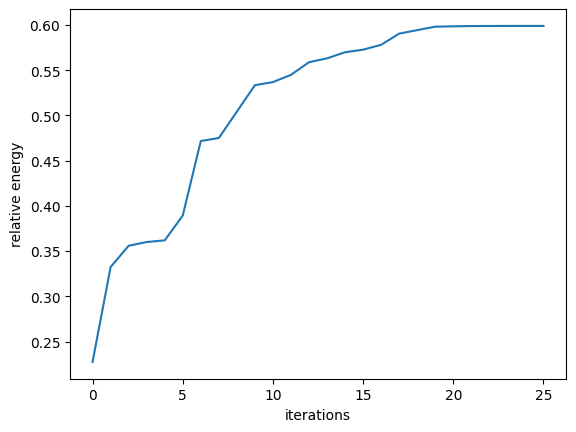

In [7]:
from exact_expectation import get_exact_expectation_afm_heisenberg
exact_energy, state = get_exact_expectation_afm_heisenberg(length)

plt.plot(history_energy/exact_energy)
plt.title('Exact energy AFM Heisenberg model')
plt.xlabel("iterations")
plt.ylabel("relative energy")
plt.show()


In [ ]:
clear_directory(".results/100iter")

Directory .results/100iter cleared.
